In [1]:
from EnergyDisaggregation.energydisaggregation.dataloader.config import DATACONFIG, CONFIG_WEATHER, CONFIG_POWER
#from EnergyDisaggregation.energydisaggregation.feature_engineering.utils import get_dataframe
import pandas as pd
import warnings
pd.options.plotting.backend = "plotly"
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
#df_process = get_dataframe()
df_process = pd.read_csv("df_process.csv", sep=",")
df_process.head()

FileNotFoundError: [Errno 2] No such file or directory: 'df_process.csv'

In [4]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736128 entries, 0 to 736127
Data columns (total 32 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Date - Heure                               736128 non-null  object 
 1   Région                                     736128 non-null  object 
 2   consommation brute électricité (mw) - rte  736128 non-null  float64
 3   température (°c)                           736128 non-null  float64
 4   nebulosité totale                          736128 non-null  float64
 5   vitesse du vent moyen 10 mn                736128 non-null  float64
 6   vitesse du vent en km/h                    736128 non-null  float64
 7   température ressentie                      736128 non-null  float64
 8   saison                                     736128 non-null  int64  
 9   is_holiday                                 736128 non-null  bool   
 10  is_bank_

In [5]:
def day_of_year(date_str):
    return date_str.timetuple().tm_yday

In [6]:
df_process["Time"] = pd.to_datetime(df_process["Date - Heure"])
df_process.set_index(["Time","Région"], inplace=True)
df_process['day_of_year'] = df_process.index.get_level_values(0).map(day_of_year)
df_process['day'] = df_process.index.get_level_values(0).map(lambda x: x.day)
df_process['month'] = df_process.index.get_level_values(0).map(lambda x: x.month)
df_process['hour'] = df_process.index.get_level_values(0).map(lambda x: x.hour)

In [7]:
df_process

Date - Heure  \
Time                      Région                                                  
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes        2013-01-01 00:00:00+01:00   
                          Bourgogne-Franche-Comté     2013-01-01 00:00:00+01:00   
                          Bretagne                    2013-01-01 00:00:00+01:00   
                          Centre-Val de Loire         2013-01-01 00:00:00+01:00   
                          Grand Est                   2013-01-01 00:00:00+01:00   
...                                                                         ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine          2019-12-31 23:00:00+01:00   
                          Occitanie                   2019-12-31 23:00:00+01:00   
                          Pays de la Loire            2019-12-31 23:00:00+01:00   
                          Provence-Alpes-Côte d'Azur  2019-12-31 23:00:00+01:00   
                          Île-de-France               2019-12-31 23:00:00+01:00   

                                                      consommation brute électricité (mw) - rte  \
Time                      Région                                                                  
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes                                           8173.0   
                          Bourgogne-Franche-Comté                                        2357.0   
                          Bretagne                                                       3050.0   
                          Centre-Val de Loire                                            2476.0   
                          Grand Est                                                      4943.0   
...                                                                                         ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine                                            12110.0   
                          Occitanie                                                     10984.0   
                          Pays de la Loire                                               8133.0   
                          Provence-Alpes-Côte d'Azur                                    12127.0   
                          Île-de-France                                                 21295.0   

                                                      température (°c)  \
Time                      Région                                         
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes                9.375000   
                          Bourgogne-Franche-Comté             2.675000   
                          Bretagne                            9.475000   
                          Centre-Val de Loire                 8.200000   
                          Grand Est                           5.075000   
...                                                                ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine                  8.133333   
                          Occitanie                           5.000000   
                          Pays de la Loire                    7.525000   
                          Provence-Alpes-Côte d'Azur          4.450000   
                          Île-de-France                      -1.075000   

                                                      nebulosité totale  \
Time                      Région                                          
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes                50.000000   
                          Bourgogne-Franche-Comté             98.750000   
                          Bretagne                            81.250000   
                          Centre-Val de Loire                 90.000000   
                          Grand Est                          100.000000   
...                                                                 ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine                 100.000000   
                          Occitanie                          

### Choix de la région

In [8]:
# version multiindex
df_region = df_process.xs("Occitanie",level=DATACONFIG["Region"])
#df_region = df_process[df_process["Région"]=="Bretagne"]
# data par heure pour une région
df_region.head()

,Date - Heure,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,is_bank_holiday,...,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7,day_of_year,day,month,hour
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+01:00,2013-01-01 00:00:00+01:00,5228.0,5.400000,100.0,1.375000,4.95,4.555811,3,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0
2013-01-01 01:00:00+01:00,2013-01-01 01:00:00+01:00,9843.0,5.683333,100.0,1.591667,5.73,4.598068,3,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1
2013-01-01 02:00:00+01:00,2013-01-01 02:00:00+01:00,9649.0,5.216667,100.0,1.958333,7.05,3.648588,3,True,True,...,-0.183333,NaN,NaN,NaN,NaN,NaN,1,1,1,2
2013-01-01 03:00:00+01:00,2013-01-01 03:00:00+01:00,9061.0,4.750000,100.0,2.325000,8.37,2.744652,3,True,True,...,-0.933333,-0.650000,NaN,NaN,NaN,NaN,1,1,1,3
2013-01-01 04:00:00+01:00,2013-01-01 04:00:00+01:00,8499.0,4.625000,100.0,2.808333,10.11,2.186304,3,True,True,...,-0.591667,-1.058333,-0.775,NaN,NaN,NaN,1,1,1,4


In [9]:
def cyclical_encoder(df_tot, col, max_val):
    df = df_tot.copy()
    # On encode les paramètres cycliques (heure, mois, etc) à l'aide de deux colonnes sin et cos
    df[col + "_sin"] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + "_cos"] = np.cos(2 * np.pi * df[col] / max_val)
    return df.loc[:, [col + "_sin", col + "_cos"]]

In [10]:
df_region_new = pd.concat([df_region, cyclical_encoder(df_region, "hour", 24)], axis=1)

### Test modèle
sélectionner les variables

In [11]:
df_region_new.columns

Index(['Date - Heure', 'consommation brute électricité (mw) - rte',
       'température (°c)', 'nebulosité totale', 'vitesse du vent moyen 10 mn',
       'vitesse du vent en km/h', 'température ressentie', 'saison',
       'is_holiday', 'is_bank_holiday', 'temperature_seuil', 'saturation',
       'diff_seuil', 'température ressentie.1', 'température (°c)_mean_48',
       'température (°c)_std_48', 'température (°c)_max_48',
       'température (°c)_min_48', 'nebulosité totale_mean_3',
       'nebulosité totale_std_3', 'month_sin', 'month_cos', 'week_day_sin',
       'week_day_cos', 'température (°c)_lag_1', 'température (°c)_lag_2',
       'température (°c)_lag_3', 'température (°c)_lag_4',
       'température (°c)_lag_5', 'température (°c)_lag_6',
       'température (°c)_lag_7', 'day_of_year', 'day', 'month', 'hour',
       'hour_sin', 'hour_cos'],
      dtype='object')

In [12]:
df_region_new

,Date - Heure,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,is_bank_holiday,...,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7,day_of_year,day,month,hour,hour_sin,hour_cos
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+01:00,2013-01-01 00:00:00+01:00,5228.0,5.400000,100.0,1.375000,4.95,4.555811,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,0,0.000000,1.000000
2013-01-01 01:00:00+01:00,2013-01-01 01:00:00+01:00,9843.0,5.683333,100.0,1.591667,5.73,4.598068,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,1,0.258819,0.965926
2013-01-01 02:00:00+01:00,2013-01-01 02:00:00+01:00,9649.0,5.216667,100.0,1.958333,7.05,3.648588,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,2,0.500000,0.866025
2013-01-01 03:00:00+01:00,2013-01-01 03:00:00+01:00,9061.0,4.750000,100.0,2.325000,8.37,2.744652,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,3,0.707107,0.707107
2013-01-01 04:00:00+01:00,2013-01-01 04:00:00+01:00,8499.0,4.625000,100.0,2.808333,10.11,2.186304,3,True,True,...,-0.775000,NaN,NaN,NaN,1,1,1,4,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+01:00,2019-12-31 19:00:00+01:00,11602.0,8.383333,100.0,2.891667,10.41,6.625210,3,True,False,...,-3.766667,-4.366667,-4.966667,-2.591667,365,31,12,19,-0.965926,0.258819
2019-12-31 20:00:00+01:00,2019-12-31 20:00:00+01:00,11096.0,7.516667,100.0,2.458333,8.85,5.899624,3,True,False,...,-3.925000,-4.633333,-5.233333,-5.833333,365,31,12,20,-0.866025,0.500000
2019-12-31 21:00:00+01:00,2019-12-31 21:00:00+01:00,10543.0,6.650000,100.0,2.025000,7.29,5.252083,3,True,False,...,-3.758333,-4.791667,-5.500000,-6.100000,365,31,12,21,-0.707107,0.707107


In [13]:
df_model = df_region_new[["consommation brute électricité (mw) - rte", "température (°c)_mean_48", 
                     "nebulosité totale_mean_3", "month_sin", "month_cos", "week_day_sin", "week_day_cos",
                     "hour_sin", "hour_cos",
                     "is_holiday", "is_bank_holiday"]]
df_model.head()

,consommation brute électricité (mw) - rte,température (°c)_mean_48,nebulosité totale_mean_3,month_sin,month_cos,week_day_sin,week_day_cos,hour_sin,hour_cos,is_holiday,is_bank_holiday
Time,,,,,,,,,,,
2013-01-01 00:00:00+01:00,5228.0,5.313542,100.0,0.5,0.866025,0.781831,0.62349,0.000000,1.000000,True,True
2013-01-01 01:00:00+01:00,9843.0,5.369097,100.0,0.5,0.866025,0.781831,0.62349,0.258819,0.965926,True,True
2013-01-01 02:00:00+01:00,9649.0,5.405208,100.0,0.5,0.866025,0.781831,0.62349,0.500000,0.866025,True,True
2013-01-01 03:00:00+01:00,9061.0,5.421875,100.0,0.5,0.866025,0.781831,0.62349,0.707107,0.707107,True,True
2013-01-01 04:00:00+01:00,8499.0,5.429340,100.0,0.5,0.866025,0.781831,0.62349,0.866025,0.500000,True,True


In [14]:
df_model.describe()

,consommation brute électricité (mw) - rte,température (°c)_mean_48,nebulosité totale_mean_3,month_sin,month_cos,week_day_sin,week_day_cos,hour_sin,hour_cos
count,61344.000000,61344.000000,61344.000000,6.134400e+04,6.134400e+04,61344.000000,61344.000000,6.134400e+04,6.134400e+04
mean,8558.259520,13.580900,81.988654,-5.040174e-03,-2.176126e-03,0.000306,0.000244,-1.841685e-17,-5.552563e-17
std,2078.924039,6.404047,28.382328,7.057100e-01,7.084911e-01,0.707143,0.707082,7.071125e-01,7.071125e-01
min,4414.000000,-3.017187,0.000000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00
25%,7065.000000,8.541536,79.861111,-8.660254e-01,-8.660254e-01,-0.781831,-0.900969,-7.071068e-01,-7.071068e-01
50%,8160.000000,13.316146,95.000000,-2.449294e-16,-1.836970e-16,0.000000,-0.222521,6.123234e-17,-6.123234e-17
75%,9917.000000,18.671484,100.000000,5.000000e-01,8.660254e-01,0.781831,0.623490,7.071068e-01,7.071068e-01
max,16860.000000,30.453993,101.000000,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00


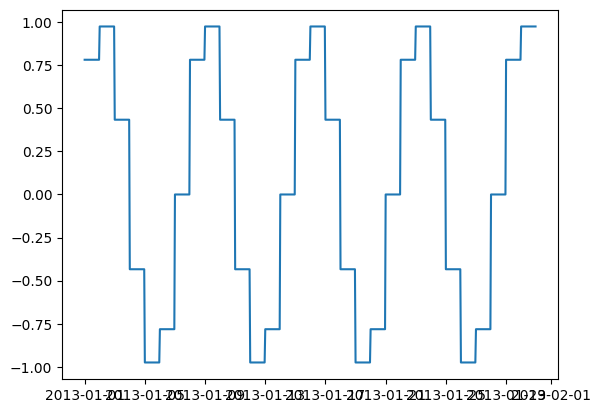

In [15]:
plt.plot(df_model['week_day_sin'][:24*30])

In [16]:
# no missing values
df_model.isna().sum(axis=0)

consommation brute électricité (mw) - rte    0
température (°c)_mean_48                     0
nebulosité totale_mean_3                     0
month_sin                                    0
month_cos                                    0
week_day_sin                                 0
week_day_cos                                 0
hour_sin                                     0
hour_cos                                     0
is_holiday                                   0
is_bank_holiday                              0
dtype: int64

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Split randomly

In [92]:
X = df_model.drop(["consommation brute électricité (mw) - rte"], axis=1)
y = df_model[["consommation brute électricité (mw) - rte"]]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Split years

In [93]:
for annee in [2013, 2014, 2015, 2016, 2017, 2018, 2019]:
    print(len(df_model[pd.to_datetime(df_model.index).year==annee]))

8760
8760
8760
8784
8760
8760
8760


In [94]:
test = df_model[(pd.to_datetime(df_model.index).year==2018) | (pd.to_datetime(df_model.index).year==2019)]
train = df_model[(pd.to_datetime(df_model.index).year!=2018) & (pd.to_datetime(df_model.index).year!=2019)]
print(len(test), len(train))
X_train_year = train.drop(["consommation brute électricité (mw) - rte"], axis=1)
y_train_year = train["consommation brute électricité (mw) - rte"]
X_test_year = test.drop(["consommation brute électricité (mw) - rte"], axis=1)
y_test_year = test["consommation brute électricité (mw) - rte"]

17520 43824


In [31]:
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_percentage_error

In [95]:
def analyse_model(X_train, y_train, X_test, y_test, model, name_model, print_metrics=True, analyse=True, plot_pred=True):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    if print_metrics == True:
        print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
        print('R2: ', reg.score(X_test, y_test))
        print('var exp: ', explained_variance_score(y_test, y_pred))
        print('mean percentage error : ', mean_absolute_percentage_error(y_test, y_pred))
    if analyse == True:
        
        if name_model == 'rf_reg':
            importances = reg.feature_importances_
            forest_importances = pd.DataFrame({'feat_imp':importances}, index=list(X_train.columns))
            print(forest_importances.sort_values(by='feat_imp', ascending=False))
        if name_model == 'lin_reg':
            coefs = reg.coef_
            coefs_values = pd.DataFrame({'coefs':coefs}, index=list(X_train.columns))
            print(coefs_values.sort_values(by='coefs', ascending=False))
    if plot_pred == True:
        plt.scatter(y_pred, y_test, s=4)
        x = np.linspace(y_pred.min(), y_pred.max(), 3)
        plt.plot(x,x, color='red', label="y=x, pred parfaite")
        plt.xlabel("y_pred")
        plt.ylabel("y_true")
        plt.title("Conso réelle en fonction de conso prédite")
        plt.legend()
    return y_pred

RMSE:  600.6675215196854
R2:  0.9148158464800304
var exp:  0.9259075304496204
mean percentage error :  0.04979893111802826
                          feat_imp
température (°c)_mean_48  0.749277
hour_cos                  0.071568
hour_sin                  0.069557
week_day_sin              0.041140
month_cos                 0.022142
month_sin                 0.015054
nebulosité totale_mean_3  0.014736
is_bank_holiday           0.007492
week_day_cos              0.004989
is_holiday                0.004046


array([ 9588.31,  8979.43,  8762.61, ..., 11482.28, 10958.12, 11526.16])

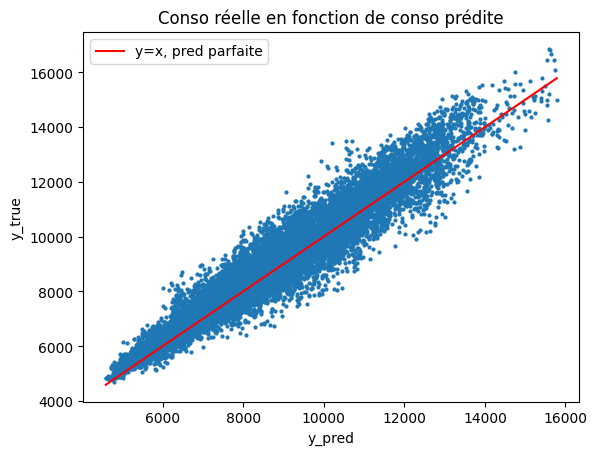

In [33]:
analyse_model(X_train_year, y_train_year, X_test_year, y_test_year, model=RandomForestRegressor(), name_model='rf_reg')

In [96]:
X_train_year.columns

Index(['température (°c)_mean_48', 'nebulosité totale_mean_3', 'month_sin',
       'month_cos', 'week_day_sin', 'week_day_cos', 'hour_sin', 'hour_cos',
       'is_holiday', 'is_bank_holiday'],
      dtype='object')

RMSE:  1324.3248325638936
R2:  0.5859244785776109
var exp:  0.6115116822423277
mean percentage error :  0.121179712017353
                               coefs
month_cos                 898.956653
month_sin                 448.479420
week_day_sin              442.767606
nebulosité totale_mean_3   -0.844968
température (°c)_mean_48 -144.693338
week_day_cos             -178.974215
hour_sin                 -493.827855
hour_cos                 -511.742440


array([ 9282.03728365,  9173.59669912,  9116.49523216, ...,
       10759.39355404, 10562.27829315, 10379.94511463])

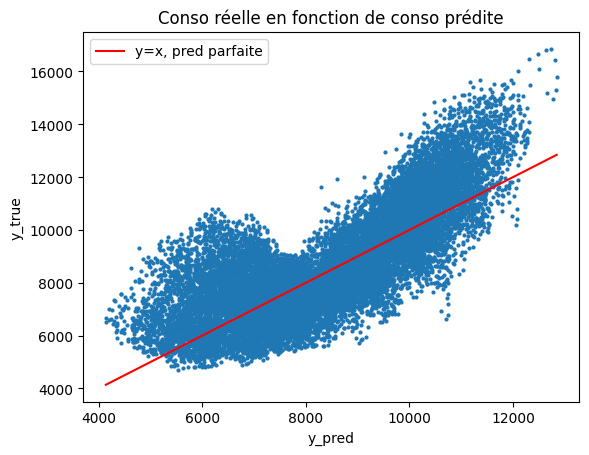

In [24]:
analyse_model(X_train_year, y_train_year, 
              X_test_year, y_test_year, model=LinearRegression(), name_model="lin_reg")

### Fit model for prediction

In [97]:
model = LinearRegression()
model.fit(X_train_year, y_train_year)

LinearRegression()

In [98]:
print(df_model["température (°c)_mean_48"].describe())

count    61344.000000
mean        13.580900
std          6.404047
min         -3.017187
25%          8.541536
50%         13.316146
75%         18.671484
max         30.453993
Name: température (°c)_mean_48, dtype: float64


In [73]:
from EnergyDisaggregation.energydisaggregation.feature_engineering.calendar import get_zone, get_holiday_for_zone
from vacances_scolaires_france import SchoolHolidayDates
from jours_feries_france import JoursFeries

holidays = SchoolHolidayDates()
feries = JoursFeries()

zone_reg = get_zone('Occitanie')

In [104]:
dates = pd.date_range(start=str(2018)+'/01/01', end=str(2018+1)+'/01/01', freq='h', tz='Europe/Warsaw')
dates

DatetimeIndex(['2018-01-01 00:00:00+01:00', '2018-01-01 01:00:00+01:00',
               '2018-01-01 02:00:00+01:00', '2018-01-01 03:00:00+01:00',
               '2018-01-01 04:00:00+01:00', '2018-01-01 05:00:00+01:00',
               '2018-01-01 06:00:00+01:00', '2018-01-01 07:00:00+01:00',
               '2018-01-01 08:00:00+01:00', '2018-01-01 09:00:00+01:00',
               ...
               '2018-12-31 15:00:00+01:00', '2018-12-31 16:00:00+01:00',
               '2018-12-31 17:00:00+01:00', '2018-12-31 18:00:00+01:00',
               '2018-12-31 19:00:00+01:00', '2018-12-31 20:00:00+01:00',
               '2018-12-31 21:00:00+01:00', '2018-12-31 22:00:00+01:00',
               '2018-12-31 23:00:00+01:00', '2019-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Warsaw]', length=8761, freq='H')

In [106]:
len(list(pd.Series(dates.date).apply(feries.is_bank_holiday)))

8761

In [109]:
def generate_annee(annee, data_train, region):
    dates = pd.date_range(start=str(annee)+'/01/01', end=str(annee+1)+'/01/01', freq='h', tz='Europe/Warsaw')
    month_list = list(dates.month)
    day_list = list(dates.weekday)
    hour_list = list(dates.hour)
    df_tot = pd.DataFrame({"month":month_list, "week_day":day_list, "hour": hour_list}, index=dates)
    df_pred = pd.concat([cyclical_encoder(df_tot, "month", 12), 
                         cyclical_encoder(df_tot, "week_day", 7),
                         cyclical_encoder(df_tot, "hour", 24)], axis=1).iloc[:-1,:]
    nebu_mean = list(data_train.groupby([pd.to_datetime(data_train.index).day_of_year, 
                                        pd.to_datetime(data_train.index).hour]).mean()['nebulosité totale_mean_3'])
    if len(df_pred) < len(nebu_mean):
        del(nebu_mean[59*24:60*24])
    if len(df_pred) > len(nebu_mean):
        left = nebu_mean[:59*24]
        right = nebu_mean[59*24:]
        nebu_mean = left.append(right)
    assert len(df_pred) == len(nebu_mean)
    df_pred["nebulosité totale_mean_3"] = nebu_mean
    df_pred["is_bank_holiday"] = list(pd.Series(dates.date).apply(feries.is_bank_holiday))[:-1]
    zone_reg = get_zone(region)
    df_pred["is_holiday"] = list(pd.DataFrame({"date":dates.date, "zone":np.repeat(zone_reg, len(dates))}
                                              ).apply(get_holiday_for_zone, axis=1))[:-1]
    return df_pred

In [110]:
data_pred = generate_annee(2018, X_train_year, 'Occitanie')
print(len(data_pred))
data_pred

8760


,month_sin,month_cos,week_day_sin,week_day_cos,hour_sin,hour_cos,nebulosité totale_mean_3,is_bank_holiday,is_holiday
2018-01-01 00:00:00+01:00,5.000000e-01,0.866025,0.0,1.0,0.000000,1.000000,78.916667,True,True
2018-01-01 01:00:00+01:00,5.000000e-01,0.866025,0.0,1.0,0.258819,0.965926,79.477778,True,True
2018-01-01 02:00:00+01:00,5.000000e-01,0.866025,0.0,1.0,0.500000,0.866025,79.350000,True,True
2018-01-01 03:00:00+01:00,5.000000e-01,0.866025,0.0,1.0,0.707107,0.707107,78.533333,True,True
2018-01-01 04:00:00+01:00,5.000000e-01,0.866025,0.0,1.0,0.866025,0.500000,76.722222,True,True
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,-2.449294e-16,1.000000,0.0,1.0,-0.965926,0.258819,100.694444,False,True
2018-12-31 20:00:00+01:00,-2.449294e-16,1.000000,0.0,1.0,-0.866025,0.500000,99.166667,False,True
2018-12-31 21:00:00+01:00,-2.449294e-16,1.000000,0.0,1.0,-0.707107,0.707107,96.416667,False,True
2018-12-31 22:00:00+01:00,-2.449294e-16,1.000000,0.0,1.0,-0.500000,0.866025,93.333333,False,True


In [112]:
X_train_year.columns

Index(['température (°c)_mean_48', 'nebulosité totale_mean_3', 'month_sin',
       'month_cos', 'week_day_sin', 'week_day_cos', 'hour_sin', 'hour_cos',
       'is_holiday', 'is_bank_holiday'],
      dtype='object')

In [113]:
conso_reg = []
temp = np.linspace(-6, 33, 100)
for i in range(len(data_pred)): 
    val_fix = data_pred.iloc[i,:]
    new_df = pd.DataFrame({"température (°c)_mean_48":temp, 
                           "nebulosité totale_mean_3":np.repeat(val_fix["nebulosité totale_mean_3"], len(temp)),
                           "month_sin":np.repeat(val_fix["month_sin"], len(temp)),
                           "month_cos":np.repeat(val_fix["month_sin"], len(temp)),
                           "week_day_sin":np.repeat(val_fix["week_day_sin"], len(temp)),
                           "week_day_cos":np.repeat(val_fix["week_day_cos"], len(temp)),
                           "hour_sin":np.repeat(val_fix["hour_sin"], len(temp)),
                           "hour_cos":np.repeat(val_fix["hour_cos"], len(temp)),
                           "is_holiday":np.repeat(val_fix["is_holiday"], len(temp)),
                           "is_bank_holiday":np.repeat(val_fix["is_bank_holiday"], len(temp))
                           })
    if i==1:
        print(new_df)
    pred = model.predict(new_df)
    conso_reg.append(pred.min())
    if i%1000:
        print(i, pred.min() )


    température (°c)_mean_48  nebulosité totale_mean_3  month_sin  month_cos  \
0                  -6.000000                 79.477778        0.5        0.5   
1                  -5.606061                 79.477778        0.5        0.5   
2                  -5.212121                 79.477778        0.5        0.5   
3                  -4.818182                 79.477778        0.5        0.5   
4                  -4.424242                 79.477778        0.5        0.5   
..                       ...                       ...        ...        ...   
95                 31.424242                 79.477778        0.5        0.5   
96                 31.818182                 79.477778        0.5        0.5   
97                 32.212121                 79.477778        0.5        0.5   
98                 32.606061                 79.477778        0.5        0.5   
99                 33.000000                 79.477778        0.5        0.5   

    week_day_sin  week_day_cos  hour_si

In [114]:
test_2018 =  df_model[(pd.to_datetime(df_model.index).year==2018)]
test_2018 = test_2018.drop(["consommation brute électricité (mw) - rte"], axis=1)
conso_pred = model.predict(test_2018)

In [115]:
conso_therm = conso_pred - conso_reg

In [116]:
res = pd.DataFrame({"conso_pred":conso_pred, "conso_reg":conso_reg, "conso_therm":conso_therm}, index=test_2018.index)
print(len(res))

8760


In [117]:
res.describe()

,conso_pred,conso_reg,conso_therm
count,8760.000000,8760.000000,8760.000000
mean,8394.489541,5502.861879,2891.627662
std,1751.710985,1108.604154,1378.732195
min,4025.746504,2500.620455,-71.154833
25%,6890.982294,4652.774740,1558.145381
50%,8432.235661,5477.161458,2829.044251
75%,9853.542995,6338.496259,4115.619035
max,13207.121115,8136.537798,5710.563086


In [118]:
res[res["conso_therm"]<=0]

,conso_pred,conso_reg,conso_therm
Time,,,
2018-05-21 23:00:00+01:00,5775.435353,5846.590186,-71.154833


In [ ]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots()
ax.plot(res.index.values, conso_pred, label='conso_pred')
ax.plot(res.index.values, conso_therm, label='conso_therm')
ax.plot(res.index.values, conso_reg, label='conso_reg')
plt.tick_params(rotation=45)

ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax.legend()
plt.show()